In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from Neuronal.dlNetworks import *
from Neuronal.Dynalearn import *
from Neuronal.dlTools import *

False
torch.Size([10000, 100])


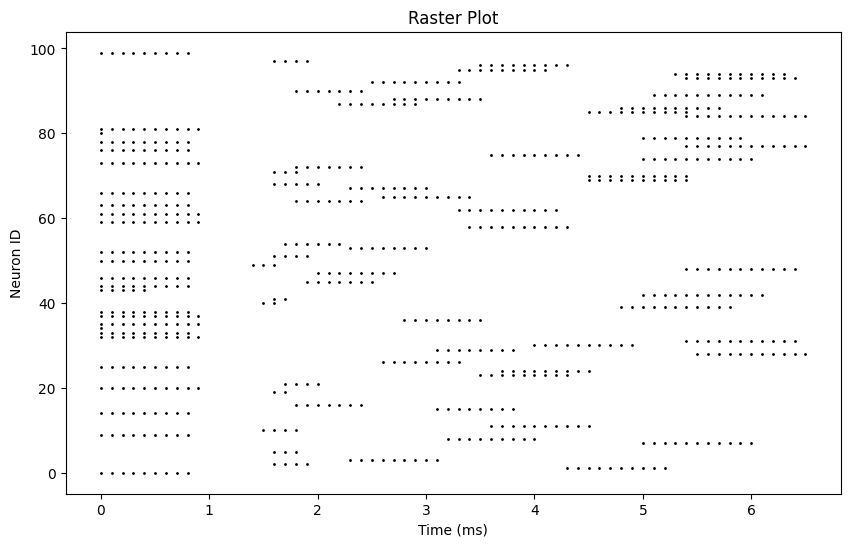

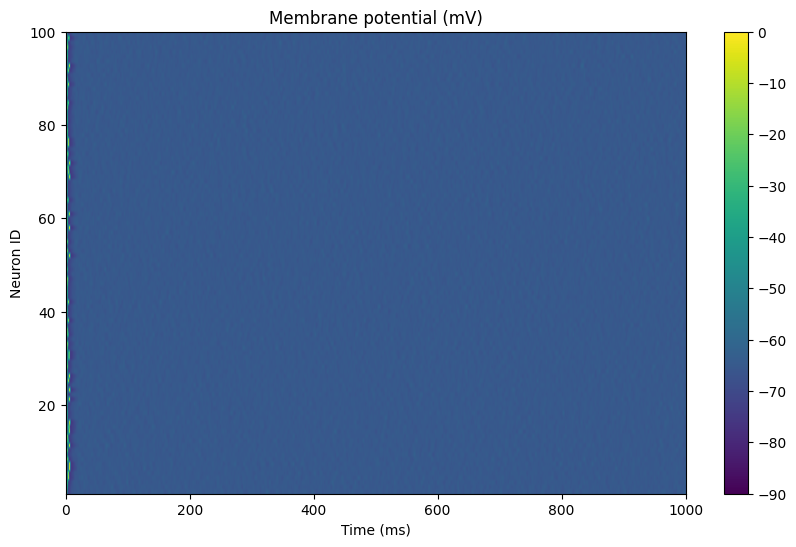

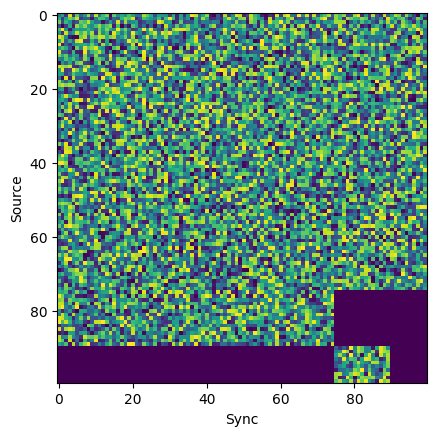

torch.Size([10000, 100])


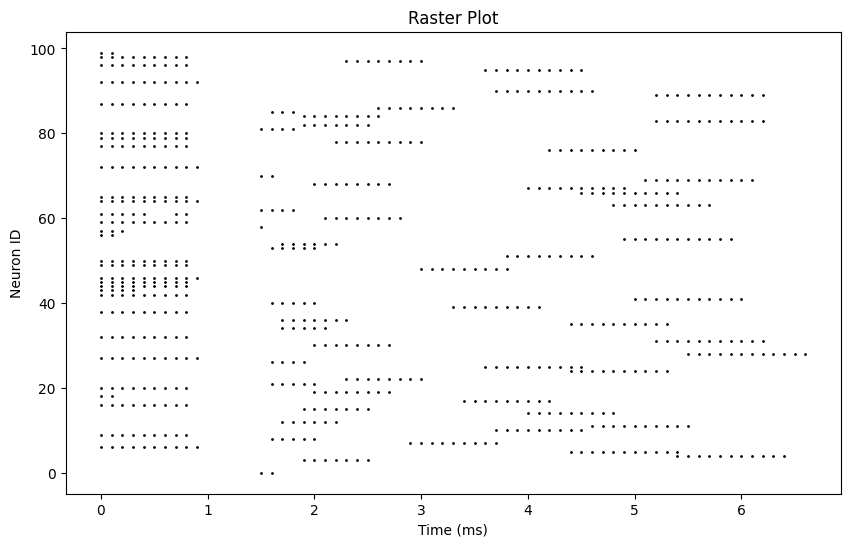

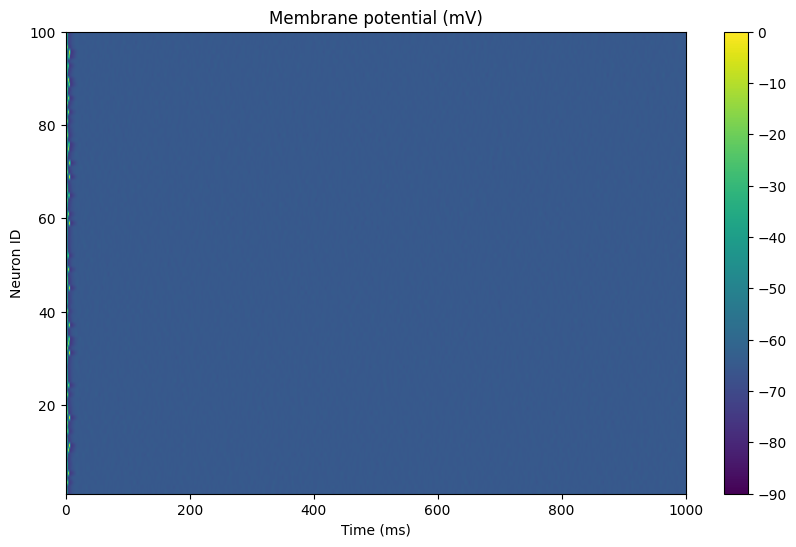

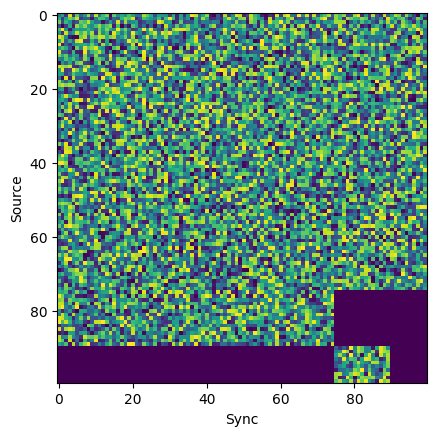

In [3]:
dt = 0.1
num_neurons = [75, 15, 10]  # Number of neurons in each population
population_types = ["EX", "PV", "SST"]  # Population types
connections = [
    (0, 1, 'AMPA', 0.2 * torch.rand(num_neurons[1], num_neurons[0])),  # EX to PV
    (0, 0, 'AMPA', 0.2 * torch.rand(num_neurons[0], num_neurons[0])),  # EX to EX
    (1, 2, 'GABAa', 0.2 * torch.rand(num_neurons[2], num_neurons[1])),   # PV to SST
    (2, 0, 'GABAa', 0.2 * torch.rand(num_neurons[0], num_neurons[2])),   # SST to EX
    (1, 0, 'GABAa', 0.2 * torch.rand(num_neurons[0], num_neurons[1]))    # PV to EX
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
network1 = HHNeurons(num_neurons, population_types, connections, dt=dt, inoise=2).to(device)
network2 = HHNeurons(num_neurons, population_types, connections, dt=dt, inoise=1).to(device)

# Define external input currents
I_ext = torch.rand(sum(num_neurons)) * 1  # External input to all populations
I_ext = I_ext.to(device)

V_histories = network1(I_ext*0, T=1000)
print(V_histories.shape)
dlraster(V_histories, threshold=-20, dt=dt)
dlpotential(V_histories, dt=dt)
dlConnections(network1)

V_histories = network2(I_ext*0, T=1000)
print(V_histories.shape)
dlraster(V_histories, threshold=-20, dt=dt)
dlpotential(V_histories, dt=dt)
dlConnections(network2)

In [9]:
torch.cuda.current_device()

AssertionError: Torch not compiled with CUDA enabled

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())


False
